In [1]:
#IMPORTS
import numpy as np
import os,sys,math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+"/Code") # so that we can import the modules below
#feel free to have a look into Network, Layer or RBM implementations to see how they work
from NN import Network,Layer,pretrain_autoencoder, plot_results
from RBM import RBM
#DATASETS DIRECTORIES
MNIST_TRAIN_DIR="./Data/MNIST1_train.npz"
MNIST_TEST_1_DIR="./Data/MNIST1_test_1.npz"
MNIST_TEST_2_DIR="./Data/MNIST1_test_2.npz"
PATCHES_DIR="./Data/PATCHES.npy"


In [2]:
#An example how to create,train and use Network structure:
x_mock_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_mock_data = np.array([0,1,1,0])[:,None]

NN = Network([2,4,1],activations=["sigmoid"]) #define a network architecture & activation
NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
NN.fit(x_mock_data,y_mock_data,batch_size=4, #fit to data
       epochs=2000,x_val=x_mock_data,y_true_val=y_mock_data) 
print("\n Targets:")
print((y_mock_data))
print("\n Predictions:")
print(NN.predict(x_mock_data)) # get predictions
print("\n Error:")
print(NN.evaluate(x_mock_data,y_mock_data)) # get error

2000:	 train err: 0.00855	 val err: 0.00854	 patience: 0																																																																																											
 Targets:
[[0]
 [1]
 [1]
 [0]]

 Predictions:
[[0.06281516]
 [0.90543373]
 [0.90967984]
 [0.11444962]]

 Error:
[0.00853624]


### Load Mnist Dataset

In [3]:
#load the MNIST dataset
#train dataset for A1,A2,A3,A8,A9
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]
print(X.shape)
#test dataset for A1,A2,A3
x_test =  np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_0"]
y_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_1"]
#test dataset for A8,A9
x_test_2 =  np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_0"]
y_test_2 = np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_1"]
#validation split
#create some validation data
X_train = X[0:2250,:]
y_train= y[0:2250]
X_val = X[2250:3000,:]
y_val = y[2250:3000]

print(X_train.shape)
print(y_train.shape)


(3000, 784)
(2250, 784)
(2250,)


## Part 1. Data Compression

### <span style="color:red">=========== Assignment 1 ===========</span>

150:	 train err: 0.02048	 val err: 0.02494	 patience: 0	

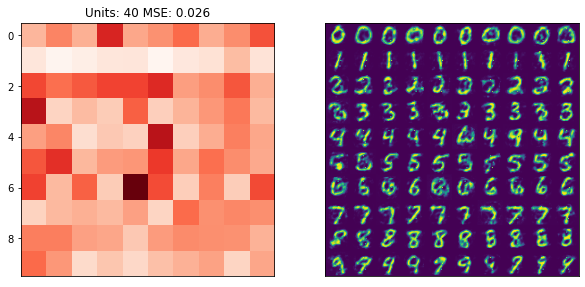

150:	 train err: 0.01015	 val err: 0.01597	 patience: 10	

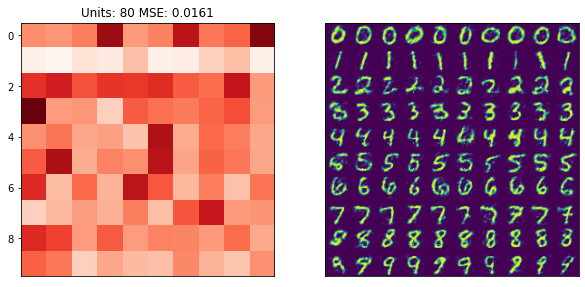

150:	 train err: 0.0036	 val err: 0.00836	 patience: 1		

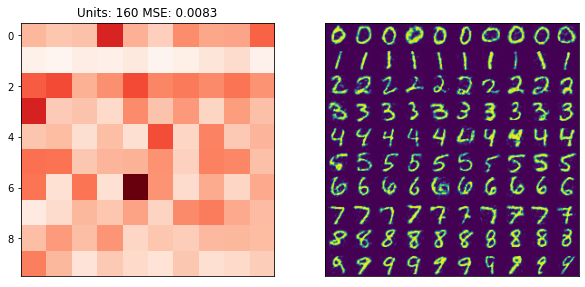

22:	 train err: 0.00669	 val err: 0.00898	 patience: 0	

In [ ]:
#Create a NN, tie its weights using the function:
#Network.tie_weights(layer_index_1,layer_index_2)
#Remember to do this before calling fit()!
#To visualize the results, use:
#plot_results(Network,data,hidden_units)
#Remember to record your results for A4!
log_mse_err = [0,0,0,0]
log_compression_ratio = [0,0,0,0]
ae = [0,0,0,0]
ae_c = [0,0,0,0]
hidden_arch = [40,80,160,320]
for i in range(0,len(hidden_arch)):
    
    NN = Network([784,hidden_arch[i],784],activations=["sigmoid"]) #define a network architecture & activation
    NN.set_lr(1.0,momentum=0.0)
    NN.tie_layer_weights(1,3)
    NN.fit(X_train,X_train,batch_size=100, #fit to data
           epochs=150,x_val=X_val,y_true_val=X_val,patience=25) 
    
    
    compression_ratio = hidden_arch[i]/784
    
    avg_mse_err = plot_results(NN,x_test ,hidden_arch[i])
    ae[i] = avg_mse_err
    ae_c[i] = compression_ratio
    
    log_mse_err[i] = math.log(avg_mse_err)
    log_compression_ratio[i] = math.log(compression_ratio)

'''
ax=plt.subplot(121)
x = plt.subplot(122)
digits = np.zeros((10*28,10*28))
for i in range(100):
        digits[28*(i//10):28*(i//10)+28,28*(i%10):28*(i%10)+28]=np.reshape(x_test[i],newshape=(28,28))
f = ax.imshow(digits)
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)
plt.show()
'''

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

79:	 train err: 0.0206	 val err: 0.03222	 patience: 25		
 Patience condition reached,best validation performance: 0.02942875807611517


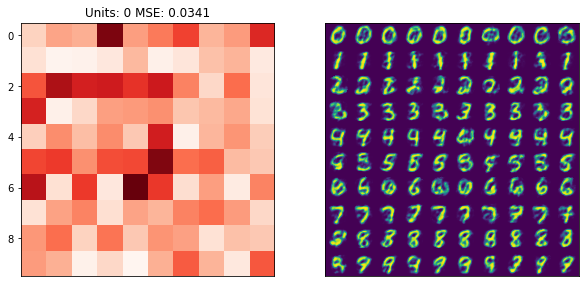

61:	 train err: 0.01325	 val err: 0.02238	 patience: 25	
 Patience condition reached,best validation performance: 0.02216026505927043


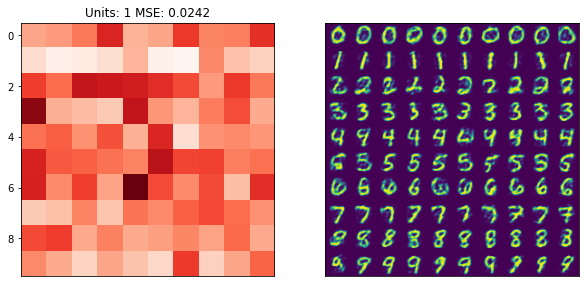

91:	 train err: 0.00518	 val err: 0.01652	 patience: 25	
 Patience condition reached,best validation performance: 0.01451632385540598


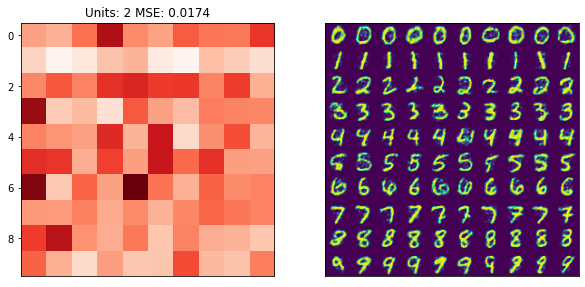

75:	 train err: 0.00321	 val err: 0.01316	 patience: 25	
 Patience condition reached,best validation performance: 0.011919781971964484


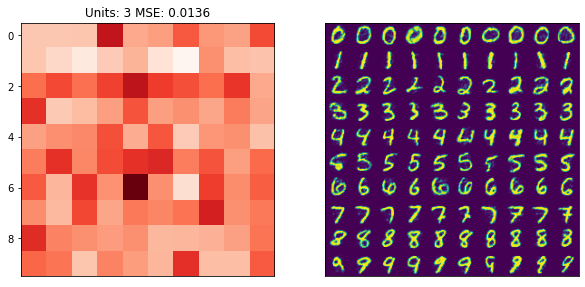

In [4]:
#Train a DAE
#add gaussian noise to data 
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [3000,784]) 

noisy_data = X + noise
noisy_data = np.clip(noisy_data,0,1)


X_train_noisy = noisy_data[0:2250,:]
#X_val_noisy = noisy_data[2250:3000,:]
dae = [0,0,0,0]
dae_c = [0,0,0,0]
log_mse_err_dae = [0,0,0,0]
log_compression_ratio_dae = [0,0,0,0]
hidden_arch = [40,80,160,320]
for i in range(0,len(hidden_arch)):
    
    NN = Network([784,hidden_arch[i],784],activations=["sigmoid"]) #define a network architecture & activation
    NN.set_lr(1.0,momentum=0.0)
    NN.tie_layer_weights(1,3)
    NN.fit(X_train_noisy,X_train,batch_size=100, #fit to data
           epochs=150,x_val=X_val,y_true_val=X_val,patience=25) 
    #y_pred = NN.predict(x_test)
    
    compression_ratio = hidden_arch[i]/784
    
    
    
    avg_mse_err = plot_results(NN,x_test ,i)
    dae[i] = avg_mse_err
    dae_c[i] = compression_ratio
    log_mse_err_dae[i] = math.log(avg_mse_err)
    log_compression_ratio_dae[i] = math.log(compression_ratio)

    

### <span style="color:red">=========== End of Assignment 2 ===========</span>

### <span style="color:red">=========== Assignment 3 ===========</span>

157:	 train err: 0.04201	 val err: 0.04344	 patience: 25	
 Patience condition reached,best validation performance: 0.0429343066914929


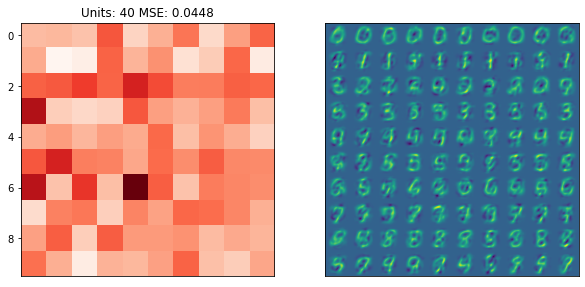

99:	 train err: 0.04378	 val err: 0.0448	 patience: 25		
 Patience condition reached,best validation performance: 0.0444574008566533


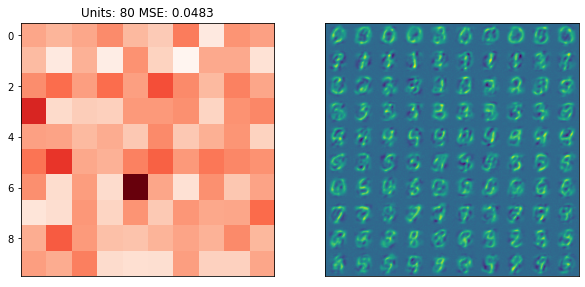

74:	 train err: 0.0458	 val err: 0.04753	 patience: 25		
 Patience condition reached,best validation performance: 0.04613667085325149


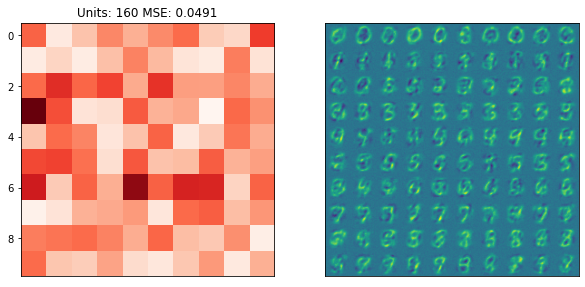

58:	 train err: 0.04983	 val err: 0.05185	 patience: 25	
 Patience condition reached,best validation performance: 0.050520507809518625


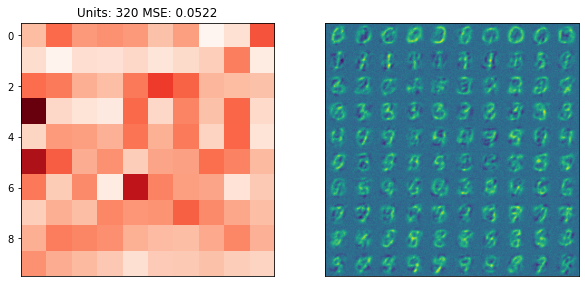

In [5]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units
rbm_i = [0,0,0,0]
rbm_c = [0,0,0,0]
log_mse_err_rbm = [0,0,0,0]
log_compression_ratio_rbm = [0,0,0,0]
for i in range(0,len(hidden_arch)):
    rbm = RBM(n_vis=784,n_hid=hidden_arch[i], use_gaussian_visible_sampling=True,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
    rbm.set_lr(lr=0.01,lr_decay=0.0,momentum=0.5,weight_decay=0)
    rbm.fit(X_train, X_val,batch_size=100,epochs=1500,patience=25)
    #mse_err_rbm = rbm._fit(x_test)
    #avg_mse_err_rbm = mse_err_rbm.mean()
    compression_ratio = hidden_arch[i]/784
    
    avg_mse_err_rbm = plot_results(rbm,x_test ,hidden_arch[i])
    rbm_i[i] = avg_mse_err_rbm
    rbm_c[i] = compression_ratio
    
    log_mse_err_rbm[i] = math.log(avg_mse_err_rbm)
    log_compression_ratio_rbm[i] = math.log(compression_ratio)

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

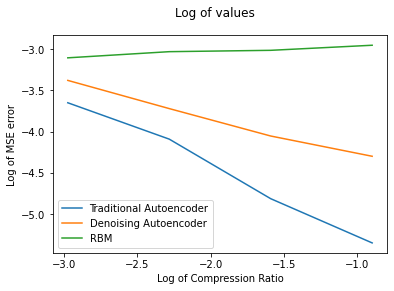

'The traditional AE works best giving the least MSE of 0.0048 for hidden number of layers 320.'

In [6]:
#Create a plot comparing compression power of different AE
fig = plt.figure()
plt.plot(log_compression_ratio,log_mse_err,label='Traditional Autoencoder')
plt.plot(log_compression_ratio_dae,log_mse_err_dae,label = 'Denoising Autoencoder')
plt.plot(log_compression_ratio_rbm,log_mse_err_rbm,label = 'RBM')
fig.suptitle('Log of values')
plt.xlabel('Log of Compression Ratio')
plt.ylabel('Log of MSE error')
plt.legend(loc="lower left")
plt.show()

'''
fig5 = plt.figure()
plt.plot(ae_c,ae,label = 'Traditional Autoencoder')
plt.plot(dae_c,dae,label = 'Denoising Autoencoder')
plt.plot(rbm_c,rbm_i,label = 'RBM')
fig5.suptitle('ACtual values')
plt.xlabel('Compression Ratio')
plt.ylabel('MSE error')
plt.legend(loc="upper right")
plt.show()
'''




'''The traditional AE works best giving the least MSE of 0.0048 for hidden number of layers 320.'''


### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

120:	 train err: 0.0121	 val err: 0.01385	 patience: 25		
 Patience condition reached,best validation performance: 0.013684494807159936


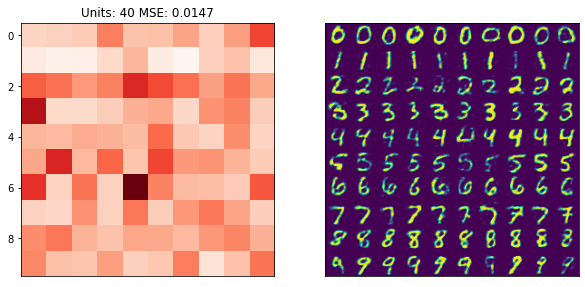

337:	 train err: 0.00853	 val err: 0.00988	 patience: 25						
 Patience condition reached,best validation performance: 0.009837964160324689


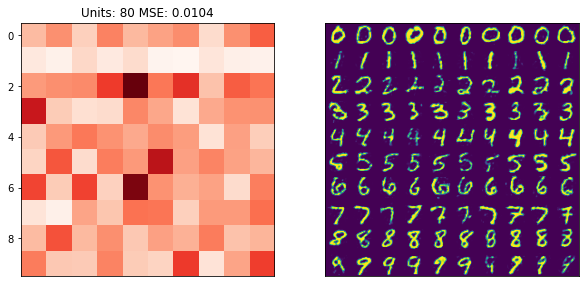

304:	 train err: 0.0082	 val err: 0.00953	 patience: 25		
 Patience condition reached,best validation performance: 0.00951179288193091


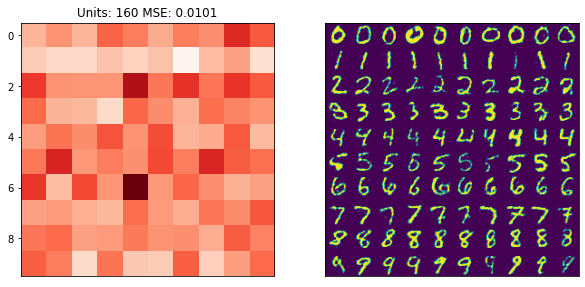

212:	 train err: 0.00829	 val err: 0.00969	 patience: 25	
 Patience condition reached,best validation performance: 0.009673385374076237


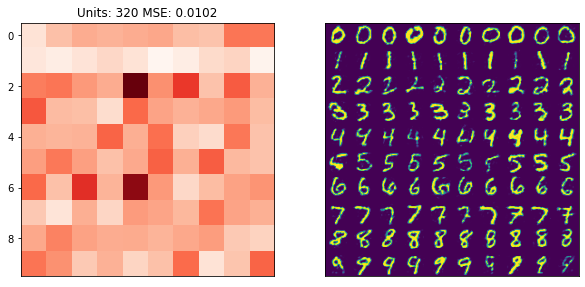

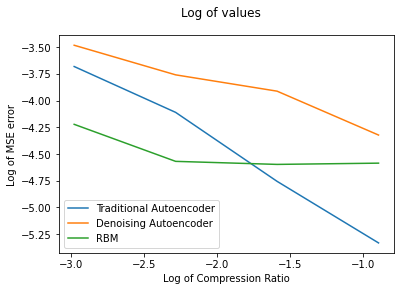

I Observed that if I set use_gaussian_visible_sampling=False, use_gaussian_hidden_sampling=true, the performance is significantly improved.


In [66]:
'''Observed that if I set use_gaussian_visible_sampling=False, use_gaussian_hidden_sampling=true, the performance is significantly improved.
'''
rbm_i = [0,0,0,0]
rbm_c = [0,0,0,0]
log_mse_err_rbm = [0,0,0,0]
log_compression_ratio_rbm = [0,0,0,0]
for i in range(0,len(hidden_arch)):
    rbm = RBM(n_vis=784,n_hid=hidden_arch[i], use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=True, use_sample_vis_for_learning=False)
    rbm.set_lr(lr=0.01,lr_decay=0.0,momentum=0.5,weight_decay=0)
    rbm.fit(X_train, X_val,batch_size=100,epochs=1500,patience=25)
    #mse_err_rbm = rbm._fit(x_test)
    #avg_mse_err_rbm = mse_err_rbm.mean()
    compression_ratio = hidden_arch[i]/784
    
    avg_mse_err_rbm = plot_results(rbm,x_test ,hidden_arch[i])
    rbm_i[i] = avg_mse_err_rbm
    rbm_c[i] = compression_ratio
    
    log_mse_err_rbm[i] = math.log(avg_mse_err_rbm)
    log_compression_ratio_rbm[i] = math.log(compression_ratio)


fig = plt.figure()
plt.plot(log_compression_ratio,log_mse_err,label='Traditional Autoencoder')
plt.plot(log_compression_ratio_dae,log_mse_err_dae,label = 'Denoising Autoencoder')
plt.plot(log_compression_ratio_rbm,log_mse_err_rbm,label = 'RBM')
fig.suptitle('Log of values')
plt.xlabel('Log of Compression Ratio')
plt.ylabel('Log of MSE error')
plt.legend(loc="lower left")
plt.show()
print('I Observed that if I set use_gaussian_visible_sampling=False, use_gaussian_hidden_sampling=true, the performance is significantly improved.')

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 2. Spatial Filer Learning

### <span style="color:red">=========== Assignment 6 ===========</span>

In [7]:
#Complete the for loop from the display_filters function that visualizes the NN weights.
#To access any Network weights, use the following syntax: 
#Network.layers[layer_index].w
def display_mean_activation(nn,x,n_units=50):
    """
    Plots a scatter plot of mean activation of the first n_units neurons of the first hidden layer.
    nn - a Network class object
    x - data on which to measure the mean activation
    n_units - how many activations are meant to be displayed
    """
    
    plt.figure(figsize=(5,5))
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    plt.scatter(np.arange(n_units),mean_activations)
    plt.xlim(int(-n_units/10),int(n_units+n_units/6))
    plt.xlabel("Hidden units")
    plt.ylabel("Mean activation")
    plt.show()
    print(nn.layers[1].w.shape)
    print(nn.layers[1].b.shape)
    W = nn.layers[1].w.T
    W = W.reshape(100,8,8)
    
    nn.get_summary()
def display_filters(nn):
    """
    Complete a function that visualizes the weights inside
    the second hidden layer of the nn in a 10x10 grid.
    Use the plt.subplot() to create 100 subplots.
    nn - a Network class object
    """
    W = nn.layers[1].w.T
    W = W.reshape(100,8,8)
    
    plt.figure(figsize=(7,7))
    
    for i in range(100):
        #COMPLETE BELOW, IT CAN TAKE MORE OR LESS LINES THAN 3
        plt.subplot(10,10,i+1)       
        
        plt.imshow(W[i],cmap="bwr")
        plt.axis('off')
        
               
    plt.show()
    
def optimise_rho_lambda(nn,x,n_units):
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    mean_activations = list(mean_activations)
    return mean_activations  

In [8]:
#Load and preprocess the dataset
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
#Here, you have to preprocess the dataset
X_norm_64=np.zeros([100000,64])
X_patches_64 = X_patches.reshape(100000,64)
#print(X_patches_64.shape)
'''for i in range(0,100000):
    for j in range(0,64):
        X_norm_64[i][j] = round((round(X_patches_64[i][j],2) - round(X_patches_64[i].min(),2))/(round(X_patches_64[i].max(),2) - round(X_patches_64[i].min(),2)),2)
'''
X_norm_64 = (X_patches_64 - X_patches_64.min())/(X_patches_64.max() - X_patches_64.min())
print(X_norm_64.shape)

X_train = X_norm_64[0:80000]
X_val = X_norm_64[80000:100000]


(100000, 64)


C:\Users\shefa\Downloads\AE_student\AE_student/Code\NN.py:81: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-x))
C:\Users\shefa\Downloads\AE_student\AE_student/Code\NN.py:86: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-self.saved_x))


13:	 train err: 0.03852	 val err: 0.03824	 patience: 10	
 Patience condition reached,best validation performance: 0.03305773948480706


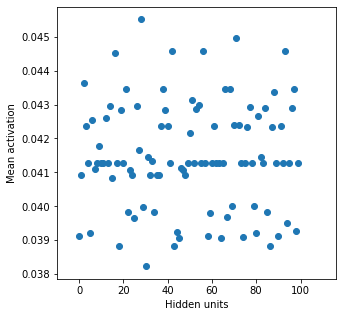

(64, 100)
(100,)
0: Input	 in:(None, 64)	 out:(None, 64)
1: Dense	 in:(None, 64)	 out:(None, 100)
2: Sigmoid	 in:(None, 100)	 out:(None, 100)
3: Dense	 in:(None, 100)	 out:(None, 64)
4: Sigmoid	 in:(None, 64)	 out:(None, 64)


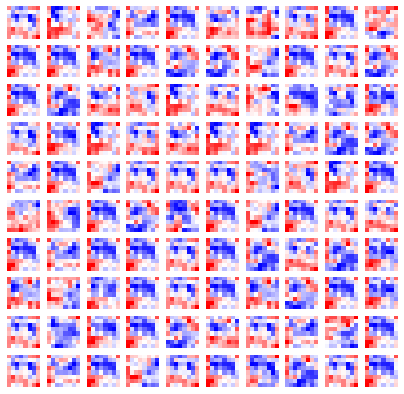

For rho  0.04  and lambda =  0.9 mean activations =
0.041471315134409104
20:	 train err: 0.02279	 val err: 0.02282	 patience: 10	
 Patience condition reached,best validation performance: 0.02218999297531296


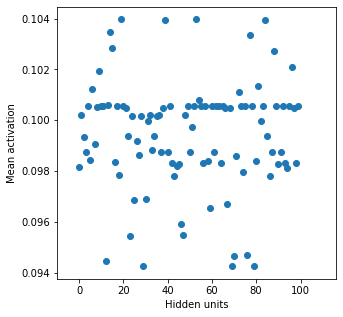

(64, 100)
(100,)
0: Input	 in:(None, 64)	 out:(None, 64)
1: Dense	 in:(None, 64)	 out:(None, 100)
2: Sigmoid	 in:(None, 100)	 out:(None, 100)
3: Dense	 in:(None, 100)	 out:(None, 64)
4: Sigmoid	 in:(None, 64)	 out:(None, 64)


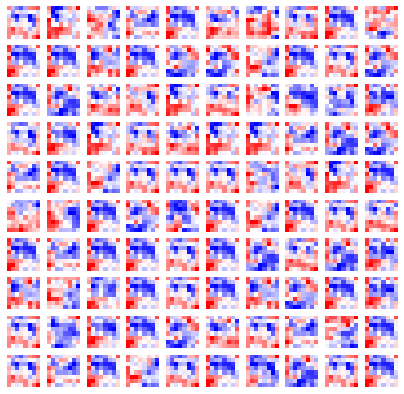

For rho  0.1  and lambda  0.5 mean activations =
0.09944858691420277
13:	 train err: 0.04239	 val err: 0.04951	 patience: 10	
 Patience condition reached,best validation performance: 0.025949593081842234


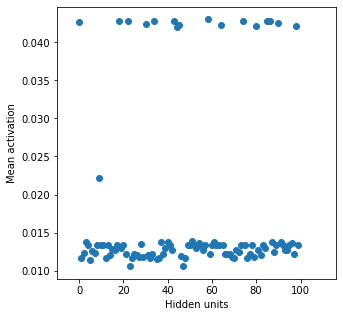

(64, 100)
(100,)
0: Input	 in:(None, 64)	 out:(None, 64)
1: Dense	 in:(None, 64)	 out:(None, 100)
2: Sigmoid	 in:(None, 100)	 out:(None, 100)
3: Dense	 in:(None, 100)	 out:(None, 64)
4: Sigmoid	 in:(None, 64)	 out:(None, 64)


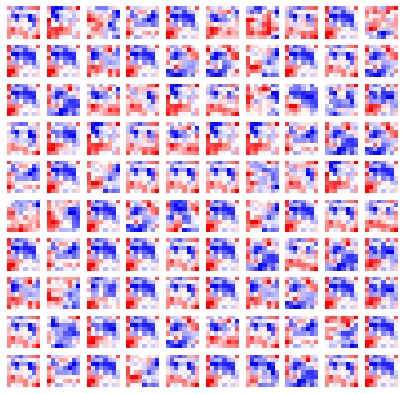

For rho  0.01  and lambda  0.5 mean activations =
0.017570567745281696
So, the best values of rho is 0.1 and of lambda is 0.5


In [9]:
#Do some hyperparameter search for lambda and rho here.
# To enable sparsity, use:
# Network.layers[activation_layer_id].enable sparsity(lambda,rho)
#Use Network.get_summary() to print network layers' summary
#Use display_mean_activation and display_filters to visualize your results

rho = 0.04
lamda = 0.9
SAE = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
SAE.set_lr(1.0,momentum=0.5)
SAE.layers[2].enable_sparsity(lamda,rho)
SAE.fit(X_train,X_train,batch_size=500, #fit to data
           epochs=60,x_val=X_val,y_true_val=X_val,patience=10) 
display_mean_activation(SAE,X_norm_64,n_units=100)
display_filters(SAE)
print("For rho ",rho," and lambda = ",lamda,"mean activations =")
mean_act = np.mean(optimise_rho_lambda(SAE,X_norm_64,n_units=100))
print(mean_act)

rho = 0.1
lamda = 0.5
SAE.layers[2].enable_sparsity(lamda,rho)
SAE.fit(X_train,X_train,batch_size=500, #fit to data
           epochs=60,x_val=X_val,y_true_val=X_val,patience=10) 
display_mean_activation(SAE,X_norm_64,n_units=100)
display_filters(SAE)
print("For rho ",rho," and lambda ",lamda,"mean activations =")
mean_act = np.mean(optimise_rho_lambda(SAE,X_norm_64,n_units=100))
print(mean_act)

rho = 0.01
lamda = 0.5
SAE.layers[2].enable_sparsity(lamda,rho)
SAE.fit(X_train,X_train,batch_size=500, #fit to data
           epochs=60,x_val=X_val,y_true_val=X_val,patience=10) 
display_mean_activation(SAE,X_norm_64,n_units=100)
display_filters(SAE)
print("For rho ",rho," and lambda ",lamda,"mean activations =")
mean_act = np.mean(optimise_rho_lambda(SAE,X_norm_64,n_units=100))
print(mean_act)
print("So, the best values of rho is",0.1,"and of lambda is",0.5)

### <span style="color:red">=========== End of Assignment 6 ===========</span>

### <span style="color:red">=========== Assignment 7 ===========</span>

30:	 train err: 0.00191	 val err: 0.00195	 patience: 10	
 Patience condition reached,best validation performance: 0.001411695897009233


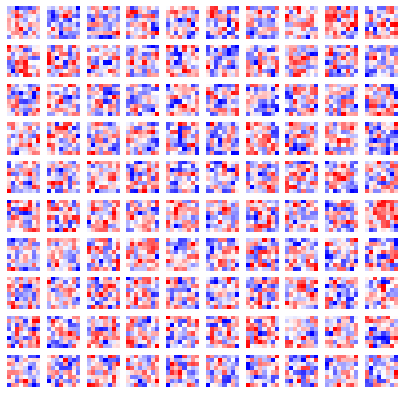

In [10]:
#Produce some results for network without sparsity constraint.
#display_filters(???)
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
#Here, you have to preprocess the dataset

X_norm = (X_patches - X_patches.min())/(X_patches.max() - X_patches.min())
X_norm_64 = X_norm.reshape(100000,64)
#print(X_norm_64.shape)
X_train = X_norm_64[0:80000]
X_val = X_norm_64[80000:100000]


OAE = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
OAE.set_lr(1.0,momentum=0.5)
OAE.tie_layer_weights(1,3)
OAE.fit(X_train,X_train,batch_size=500, #fit to data
           epochs=60,x_val=X_val,y_true_val=X_val,patience=10) 
#display_mean_activation(SAE,X_norm_64,n_units=100)
display_filters(OAE)

### <span style="color:red">=========== End of Assignment 7 ===========</span>

## Part 3. Visualization

### <span style="color:red">=========== Assignment 8 ===========</span>

In [3]:
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]
X_train = X[0:2250,:]
y_train= y[0:2250]
X_val = X[2250:3000,:]
y_val = y[2250:3000]
# Define the network architecture and use the pretrain_autoencoder function to pretrain it.
net = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid", "sigmoid", "sigmoid","linear","sigmoid", "sigmoid", "sigmoid","sigmoid"]) #define a network architecture & activation

pretrain_autoencoder(net, X_train, X_val, rbm_lr=0.1, rbm_use_gauss_visible=False,
rbm_use_gauss_hidden=False, rbm_mom=0.5, rbm_weight_decay=0.0, rbm_lr_decay=0.0,
rbm_batch_size=100, rbm_epochs=500,rbm_patience=25)



Fine tuning layer number 0
181:	 train err: 0.00659	 val err: 0.01055	 patience: 25	
 Patience condition reached,best validation performance: 0.010461798054594173

Fine tuning layer number 1
212:	 train err: 0.01166	 val err: 0.01621	 patience: 25	
 Patience condition reached,best validation performance: 0.01604935043462268

Fine tuning layer number 2
167:	 train err: 0.01057	 val err: 0.01439	 patience: 25	
 Patience condition reached,best validation performance: 0.014258364985333434

Fine tuning layer number 3
37:	 train err: 0.15524	 val err: 0.14839	 patience: 25	
 Patience condition reached,best validation performance: 0.14813343594624975
Pre training finished!


30:	 train err: 0.03371	 val err: 0.04076	 patience: 25	
 Patience condition reached,best validation performance: 0.04060003705176857


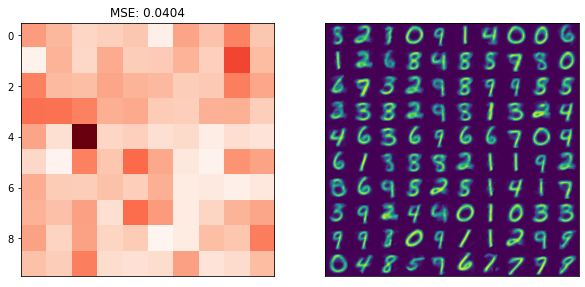

Validation error after stopping= 0.04075910219905015


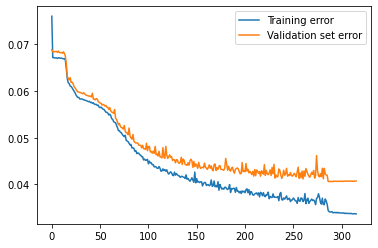

316


In [15]:
# Fine-tune the pre-trained autoencoder. You can also use the plot_results function from A1
# to visualize the reconstructions before and after fine-tuning
epoch = 500
lr = 0.05
net.set_lr(lr,momentum=0.5) 
net.set_lr(lr,momentum=0.5) 
net.tie_layer_weights(1,15)
net.tie_layer_weights(3,13)
net.tie_layer_weights(5,11)
net.tie_layer_weights(7,9)
net.fit(X_train,X_train,batch_size=100, #fit to data
           epochs=epoch,x_val=X_val,y_true_val=X_val,patience=25)
mse = plot_results(net,X_val)
#print(y_val[0:100].reshape(10,10))
#print("Mean squared error on validation set= ",mse,"with lr = ",lr)
lst2 = net.val_err_hist
lst1 = net.train_err_hist
print("Validation error after stopping=",lst2[-1])
plt.plot(list(range(0, len(lst1))),lst1,label="Training error")

plt.plot(list(range(0, len(lst2))),lst2,label="Validation set error")
plt.legend(loc="upper right")
plt.show()
print(len(lst2))

Test set 2 representations in 2D:-


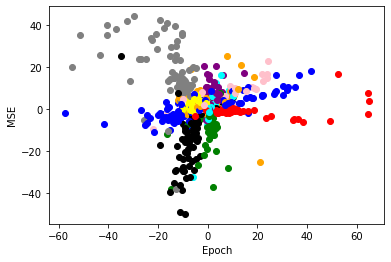

In [16]:
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!
plt.figure(figsize=(7,7))
print("Test set 2 representations in 2D:-")
%matplotlib inline
mydict = {0:"grey",1:"red",2:"blue",3:"yellow",4:"green",5:"orange",6:"black",7:"purple",8:"pink",9:"cyan"}
#print(mydict[8])
xyz = net.get_layer_output(x_test_2,7)
fig = plt.figure()
for i in range(0,1000):
    x = xyz[i,0]
    y = xyz[i,1]
    plt.scatter(x,y,c=mydict.get(y_test_2[i]))
#plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()



### <span style="color:red">=========== End of Assignment 8 ===========</span>

### <span style="color:red">=========== Assignment 9 ===========</span>

In [12]:
#Create and train another network, this time without pretraining.
#You can use the plot_results function to see the results.
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]
X_train = X[0:2250,:]
y_train= y[0:2250]
X_val = X[2250:3000,:]
y_val = y[2250:3000]
lst2 = []
lst1 = []
'''
for i in np.arange(0.1,1.1,0.1):
    print("For LR=",i)
    net = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid", "sigmoid", "sigmoid","linear","sigmoid", "sigmoid", "sigmoid","sigmoid"]) #define a network architecture & activation
    net.set_lr(i,momentum=0.5) 
    net.tie_layer_weights(1,15)
    net.tie_layer_weights(3,13)
    net.tie_layer_weights(5,11)
    net.tie_layer_weights(7,9)
    net.fit(X_train,X_train,batch_size=100, epochs=500,x_val=X_val,y_true_val=X_val,patience=25)
    lst2.append(net.val_err_hist)
    lst1.append(net.train_err_hist)
    #mse = plot_results(net,X_val)'''

print(y_val[0:100].reshape(10,10))
print("Least MSE is achieved with LR=0.2")
net = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid", "sigmoid", "sigmoid","linear","sigmoid", "sigmoid", "sigmoid","sigmoid"])
net.set_lr(0.2,momentum=0.5) 
net.tie_layer_weights(1,15)
net.tie_layer_weights(3,13)
net.tie_layer_weights(5,11)
net.tie_layer_weights(7,9)
net.fit(X_train,X_train,batch_size=100, epochs=500,x_val=X_val,y_true_val=X_val,patience=25)



[[5 2 3 0 4 1 4 0 5 6]
 [1 2 6 3 4 8 5 9 5 0]
 [2 7 5 2 9 3 4 4 0 5]
 [2 5 5 2 9 8 3 5 2 4]
 [4 6 7 6 4 6 6 7 0 9]
 [6 1 8 8 5 2 1 1 5 2]
 [0 6 9 5 2 3 1 4 1 7]
 [6 9 2 4 6 0 1 0 5 5]
 [5 9 2 0 4 1 1 2 4 3]
 [0 4 2 5 7 6 2 7 7 8]]
Least MSE is achieved with LR=0.2
286:	 train err: 0.03575	 val err: 0.04197	 patience: 25	
 Patience condition reached,best validation performance: 0.041174402987583965


Test set 2 representations in 2D:-


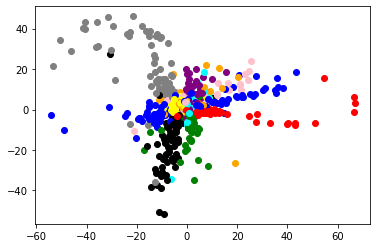

Color coding = {0: 'grey', 1: 'red', 2: 'blue', 3: 'yellow', 4: 'green', 5: 'orange', 6: 'black', 7: 'purple', 8: 'pink', 9: 'cyan'}


In [13]:
#Plot 2D representations for the new network.

plt.figure(figsize=(7,7))
print("Test set 2 representations in 2D:-")
%matplotlib inline
mydict = {0:"grey",1:"red",2:"blue",3:"yellow",4:"green",5:"orange",6:"black",7:"purple",8:"pink",9:"cyan"}
#print(mydict[8])
xyz = net.get_layer_output(x_test_2,7)
fig = plt.figure()
for i in range(0,1000):
    x = xyz[i,0]
    y = xyz[i,1]
    plt.scatter(x,y,c=mydict.get(y_test_2[i]))

plt.show()
print("Color coding =",mydict)


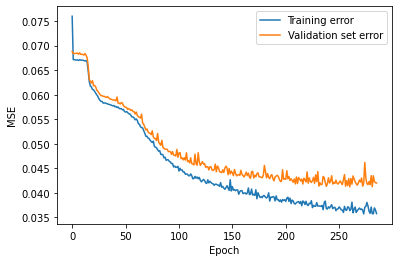

In [14]:
#Create a plot of training metrics.

epochs = 150
lst2 = net.val_err_hist
lst1 = net.train_err_hist

plt.plot(list(range(0, len(lst1))),lst1,label="Training error")

plt.plot(list(range(0, len(lst2))),lst2,label="Validation set error")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("MSE")
#print(len(net.val_err_hist))
plt.show()


### <span style="color:red">=========== End of Assignment 9 ===========</span>